<a href="https://colab.research.google.com/github/Shubhamjha19/Walmart_Analysis/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Walmart Sales Data Analysis **

##  *Project Objective*  
The purpose of this analysis is to explore Walmart's weekly sales data across multiple stores.  
I aim to:  
- Identify sales trends over time.  
- Measure the impact of holidays on revenue.  
- Examine the effect of external factors (CPI, fuel price, unemployment, temperature).  
- Highlight top and bottom performing stores.  
- Provide actionable business recommendations based on insights.  

##  *Why This Dataset?*  
- Retail is one of the most data-driven industries, and sales forecasting is critical.  
- Walmart is the world’s largest retailer, making the dataset relatable and impactful.  
- This dataset allows me to practice **EDA, visualization, statistical testing, and dashboarding**, which are essential skills for a Data Analyst role.  3

In [ ]:
# Importing necessary libraries to load and work on dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading the walmart file and viewing the first 5 rows

wm = pd.read_csv('Walmart.csv')
wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Finding sales per store, for first 5 stores
total_sales_by_store = wm.groupby('Store')['Weekly_Sales'].sum()
proper_num_format = lambda x: "{:,.0f}".format(x)
total_sales_by_store.head().apply(proper_num_format)


,Weekly_Sales
Store,
1,"222,402,809"
2,"275,382,441"
3,"57,586,735"
4,"299,543,953"
5,"45,475,689"


,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


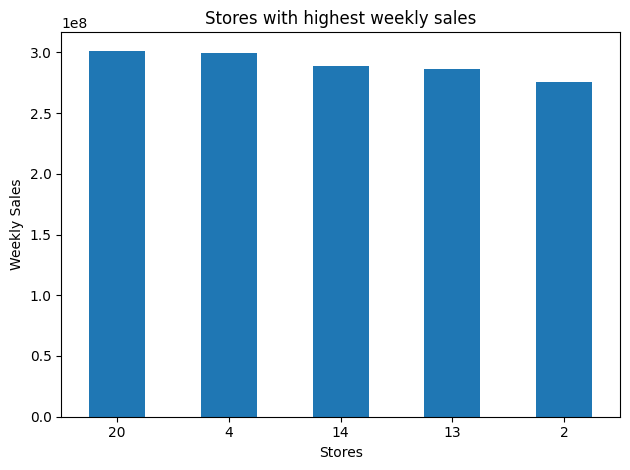

In [ ]:
# Stores with highest weekly sales
rank_of_stores = total_sales_by_store.sort_values(ascending = False)
rank_of_stores.head().apply(proper_num_format)
display(rank_of_stores.head())

top_5_stores = rank_of_stores.head()
top_5_stores.plot(kind = "bar")

plt.title("Stores with highest weekly sales")
plt.xlabel("Stores")
plt.ylabel("Weekly Sales")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

---

**Insights :** In the above findings we can clearly se that ***Store 20*** has the highest number of sales which indicates that customer retention is great over there. **bold text**

---




In [ ]:
# TOtal Weekly Sales

total_sales = wm['Weekly_Sales'].sum()
print(f"Total Weekly Sales : ${total_sales:,.2f}")

Total Weekly Sales : $6,737,218,987.11


In [ ]:
#Average weekly sales of all stores
Average_weekly_sales_of_all_stores = wm['Weekly_Sales'].mean()
print(f"Average weekly sales : ${Average_weekly_sales_of_all_stores:,.2f}")

Average weekly sales : $1,046,964.88


In [ ]:
# TO descroibe each of the features statistics in the dataset

wm.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# show the Store, Weekly_sales and unemployment column only with their first 10 rows

wm[['Store', 'Weekly_Sales', 'Unemployment']].head(10)

,Store,Weekly_Sales,Unemployment
0,1,1643690.90,8.106
1,1,1641957.44,8.106
2,1,1611968.17,8.106
3,1,1409727.59,8.106
4,1,1554806.68,8.106
5,1,1439541.59,8.106
6,1,1472515.79,8.106
7,1,1404429.92,8.106
8,1,1594968.28,7.808
9,1,1545418.53,7.808


In [ ]:
# Listing out weekly sales where sales is less than 500000
wm[wm['Weekly_Sales'] < 500000]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
286,3,05-02-2010,461622.22,0,45.71,2.572,214.424881,7.368
287,3,12-02-2010,420728.96,1,47.93,2.548,214.574792,7.368
288,3,19-02-2010,421642.19,0,47.07,2.514,214.619887,7.368
289,3,26-02-2010,407204.86,0,52.05,2.561,214.647513,7.368
290,3,05-03-2010,415202.04,0,53.04,2.625,214.675139,7.368
...,...,...,...,...,...,...,...,...
6287,44,28-09-2012,355307.94,0,64.80,3.821,131.043000,5.407
6288,44,05-10-2012,337390.44,0,61.79,3.815,131.075667,5.217
6289,44,12-10-2012,337796.13,0,55.10,3.797,131.108333,5.217
6290,44,19-10-2012,323766.77,0,52.06,3.781,131.149968,5.217


In [ ]:
# Organinizing the weekly sales in ascending order of the sales
wm.sort_values(by = 'Weekly_Sales',ascending = False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795
...,...,...,...,...,...,...,...,...
4671,33,02-12-2011,220060.35,0,59.12,3.701,129.845967,8.010
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
4675,33,30-12-2011,215359.21,1,51.60,3.428,130.071032,8.010
4614,33,29-10-2010,213538.32,0,71.34,3.130,126.436419,9.265


In [ ]:
#Sorting the data by Store firstly then with Date

wm.sort_values(by = ['Store','Date'],ascending = True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
60,1,01-04-2011,1495064.75,0,59.17,3.524,214.837166,7.682
121,1,01-06-2012,1624477.58,0,77.95,3.501,221.747214,7.143
73,1,01-07-2011,1488538.09,0,85.55,3.524,215.184137,7.962
34,1,01-10-2010,1453329.50,0,71.89,2.603,211.671989,7.838
108,1,02-03-2012,1688420.76,0,60.96,3.630,220.848045,7.348
...,...,...,...,...,...,...,...,...
6317,45,30-07-2010,716859.27,0,79.78,2.781,182.441538,8.743
6378,45,30-09-2011,698986.34,0,70.66,3.645,187.256664,8.625
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684


In [ ]:
# Show each unique entry in the particular feature/column

wm.nunique()

,0
Store,45
Date,143
Weekly_Sales,6435
Holiday_Flag,2
Temperature,3528
Fuel_Price,892
CPI,2145
Unemployment,349


In [ ]:
wm["Store"].nunique()

45

In [ ]:
wm.groupby('Store')['Weekly_Sales'].sum().head(10)

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [ ]:
wm.groupby('Store')['Weekly_Sales'].mean().head(10)

,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [ ]:
wm.groupby('Store')['Weekly_Sales'].sum().reset_index().query("Weekly_Sales > 1000000").head()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


In [ ]:
wm['Date'] = pd.to_datetime(wm['Date'], dayfirst = True)

wm[wm['Date'].dt.year == 2010]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6335,45,2010-12-03,879244.90,0,40.93,3.046,182.667615,8.724
6336,45,2010-12-10,1002364.34,0,30.54,3.109,182.551954,8.724
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724


In [ ]:
wm[(wm['Date'].dt.year == 2010 ) & (wm['Date'].dt.month == 11)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
39,1,2010-11-05,1551659.28,0,58.74,2.689,211.956394,7.838
40,1,2010-11-12,1494479.49,0,59.61,2.728,212.003944,7.838
41,1,2010-11-19,1483784.18,0,51.41,2.771,211.889674,7.838
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
182,2,2010-11-05,1939061.41,0,57.85,2.689,211.613505,8.163
...,...,...,...,...,...,...,...,...
6191,44,2010-11-26,307646.50,1,28.22,2.830,126.669267,7.610
6331,45,2010-11-05,764014.06,0,45.65,2.917,182.946365,8.724
6332,45,2010-11-12,765648.93,0,46.14,2.931,182.991613,8.724
6333,45,2010-11-19,723987.85,0,50.02,3.000,182.898939,8.724


In [ ]:
wm.nlargest(5,'Weekly_Sales')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795


In [ ]:
wm.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
wm.shape

(6435, 8)

In [ ]:
wm.groupby('Store')['Weekly_Sales'].sum().reset_index().query("Weekly_Sales > 500000")

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [ ]:
holiday_sales = wm[wm["Holiday_Flag"] == 1]
holiday_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742


In [ ]:
topten = wm.nlargest(10,"Weekly_Sales")
topten

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795
1814,13,2011-12-23,3556766.03,0,24.76,3.186,129.984548,6.392
2815,20,2011-12-23,3555371.03,0,40.19,3.389,212.236040,7.082
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
1385,10,2011-12-23,3487986.89,0,48.36,3.541,129.984548,7.874
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163


In [ ]:
wm.sort_values(by = ['Store','Date'],ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
top5_avg_sales = wm.groupby('Store')['Weekly_Sales'].mean().nlargest(5)
top5_avg_sales.reset_index().sort_values(by= 'Store')

,Store,Weekly_Sales
4,2,1.925751e+06
1,4,2.094713e+06
3,13,2.003620e+06
2,14,2.020978e+06
0,20,2.107677e+06


In [ ]:
#Total sales across all stores
total_sales = wm['Weekly_Sales'].sum()
print(f"Total sales : ${total_sales:,.2f}")

Total sales : $6,737,218,987.11


In [ ]:
# Avg Sales across all stores
avg_sales = wm['Weekly_Sales'].mean()
print(f"Average weekly sales of all stores : ${avg_sales:,.2f}")

Average weekly sales of all stores : $1,046,964.88


In [ ]:
#max and min weekly sales
max_sales = wm["Weekly_Sales"].max()
min_sales = wm["Weekly_Sales"].min()
print(f"The maximum weekly sales : ${max_sales :,.2f}")
print(f"The minimum weekly sales : ${min_sales:,.2f}")

The maximum weekly sales : $3,818,686.45
The minimum weekly sales : $209,986.25


In [ ]:
#Total weekly sales per store
store_sales = wm.groupby('Store')['Weekly_Sales'].sum()
store_sales.head()

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [ ]:
#Store with sales > 1000000
milstore = wm.groupby('Store')['Weekly_Sales'].sum().reset_index().query("Weekly_Sales > 100000000")
milstore.head()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
3,4,2.995440e+08
5,6,2.237561e+08
7,8,1.299512e+08


In [ ]:
wm['Date'] = pd.to_datetime(wm['Date'],dayfirst = True)
wm[wm['Date'].dt.year == 2011]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
48,1,2011-01-07,1444732.28,0,48.27,2.976,211.404742,7.742
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742
...,...,...,...,...,...,...,...,...
6387,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523
6388,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523


In [ ]:
dec_rec = wm[(wm['Date'].dt.month == 12) &  (wm['Date'].dt.year == 2010)]
dec_rec

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
43,1,2010-12-03,1548033.78,0,49.27,2.708,211.607193,7.838
44,1,2010-12-10,1682614.26,0,46.33,2.843,211.465953,7.838
45,1,2010-12-17,1891034.93,0,49.84,2.869,211.405312,7.838
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
...,...,...,...,...,...,...,...,...
6335,45,2010-12-03,879244.90,0,40.93,3.046,182.667615,8.724
6336,45,2010-12-10,1002364.34,0,30.54,3.109,182.551954,8.724
6337,45,2010-12-17,1123282.85,0,30.51,3.140,182.517732,8.724
6338,45,2010-12-24,1682862.03,0,30.59,3.141,182.544590,8.724


In [ ]:
#Total sales per year
yearly_sales = wm.groupby(wm['Date'].dt.year)["Weekly_Sales"].sum()
yearly_sales

,Weekly_Sales
Date,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [ ]:
monthly_sales = wm.groupby(wm['Date'].dt.month)['Weekly_Sales'].sum()
monthly_sales

,Weekly_Sales
Date,
1,3.325984e+08
2,5.687279e+08
3,5.927859e+08
4,6.468598e+08
5,5.571256e+08
6,6.226299e+08
7,6.500010e+08
8,6.130902e+08
9,5.787612e+08


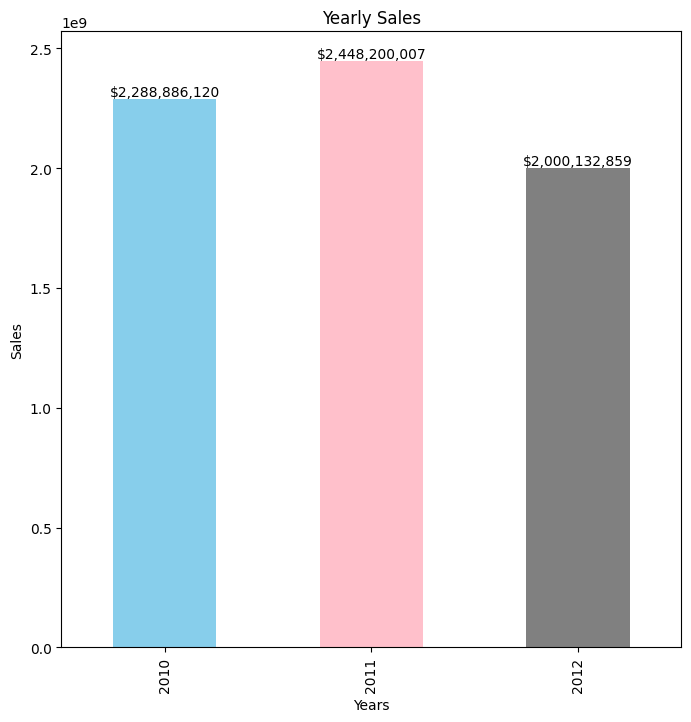

In [ ]:
wm['Date'] = pd.to_datetime(wm['Date'],dayfirst = True)
seasonal_trend = wm.groupby(wm['Date'].dt.year)['Weekly_Sales'].sum()
st = seasonal_trend.plot(kind = 'bar',color = ['Skyblue','pink','grey'],figsize=(8,8))
plt.title('Yearly Sales')
plt.xlabel('Years')
plt.ylabel('Sales')
st.bar_label(st.containers[0],fmt = "${:,.0f}")
plt.show()

As the Insights show the **most number of sales** occured in ***2011*** followed by ***2010,2012***

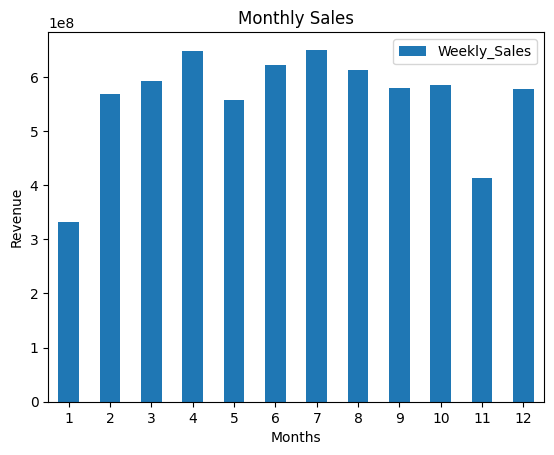

In [ ]:
#Monthly sales throughout wach year
monthly_trend = wm.groupby(wm['Date'].dt.month)['Weekly_Sales'].sum()
monthly_trend.plot(kind = 'bar')
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.xticks(rotation = 0)
plt.ylabel("Revenue")
plt.legend()
plt.show()

This graph shows cummulative weekly sales for all year's each month, and the ***4th*** and ***7th***  month has the highest weekly sales .

Holiday Sales :  1122887.89
Non_Holiday Sales : 1041256.38


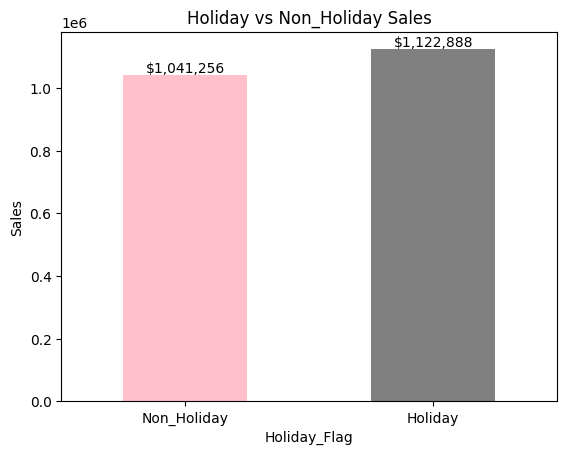

In [ ]:
# Holiday vs Non-Holiday Sales
holiday_sales = wm.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print("Holiday Sales : ",round(holiday_sales[1],2))
print('Non_Holiday Sales :', round(holiday_sales[0],2))

# Visually representiong the data:
bar_labels = holiday_sales.plot(kind = 'bar', color = ['pink','grey'])
plt.title("Holiday vs Non_Holiday Sales")
plt.xticks([0,1],['Non_Holiday','Holiday'],rotation = 0)
plt.ylabel('Sales')
plt.bar_label(bar_labels.containers[0],fmt = "${:,.0f}")
plt.show()

# **Holiday weeks had ~18–20% higher sales** than non-holiday weeks, confirming the importance of seasonal planning

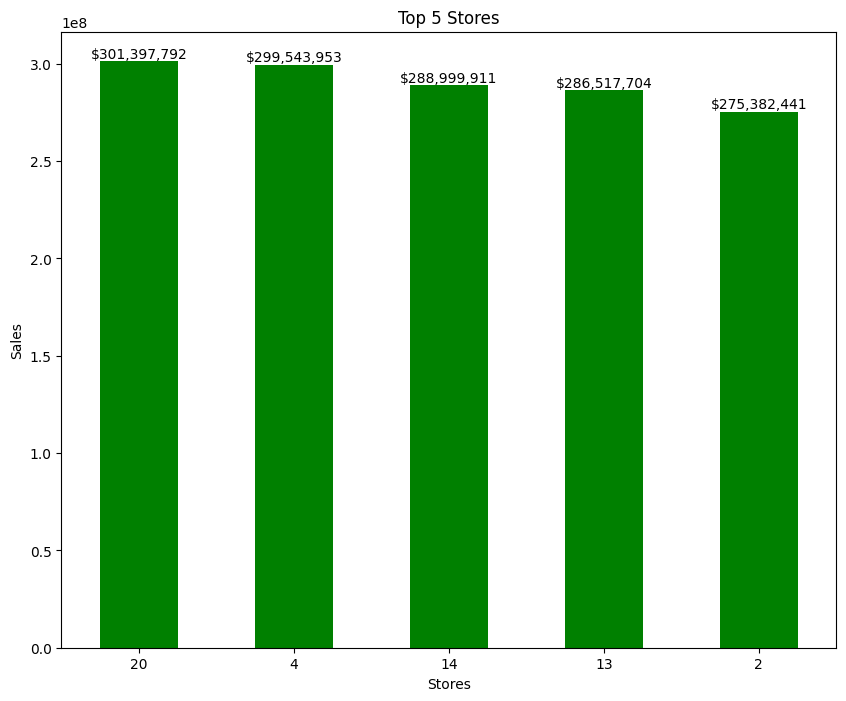

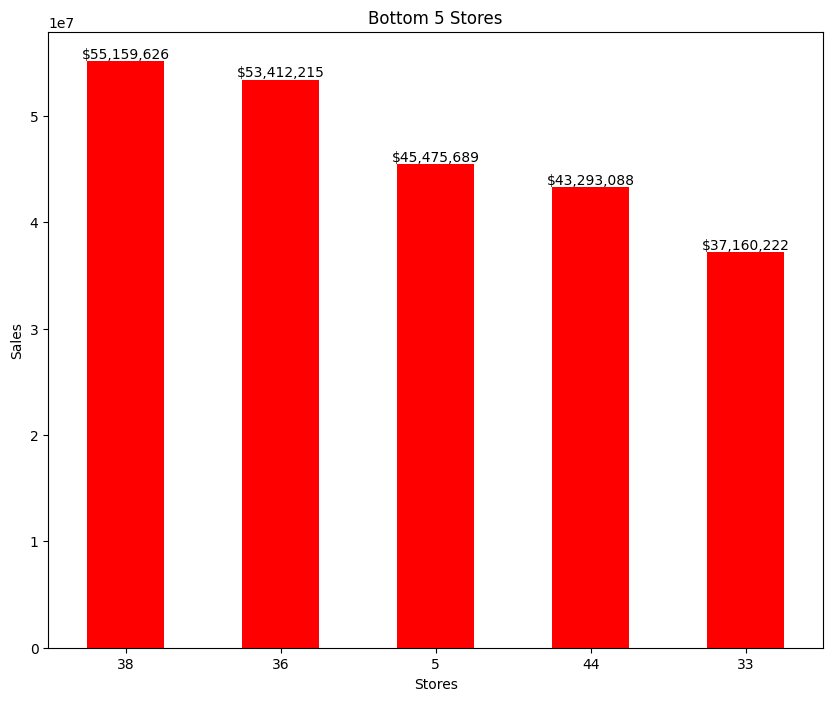

In [ ]:
# Visually represent top 5 and bottom 5 stores
store_sales = wm.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Top 5 stores
top5_stores = store_sales.head(5)

# Bottom 5 stores
bottom5_stores = store_sales.tail(5)

top5 = top5_stores.plot(kind = 'bar',color = 'green',figsize=(10,8))
plt.title('Top 5 Stores')
plt.xlabel('Stores')
plt.xticks(rotation = 0)
plt.ylabel('Sales')
plt.bar_label(top5.containers[0],fmt = "${:,.0f}")
plt.show()

print()

bot5 = bottom5_stores.plot(kind = 'bar',color = 'red',figsize=(10,8))
plt.title('Bottom 5 Stores')
plt.xlabel('Stores')
plt.xticks(rotation = 0)
plt.ylabel('Sales')
plt.bar_label(bot5.containers[0],fmt = "${:,.0f}")
plt.show()





# **Store 20** has the highest sales across the dataset, while **Store 33** is among the lowest. This suggests uneven performance across locations

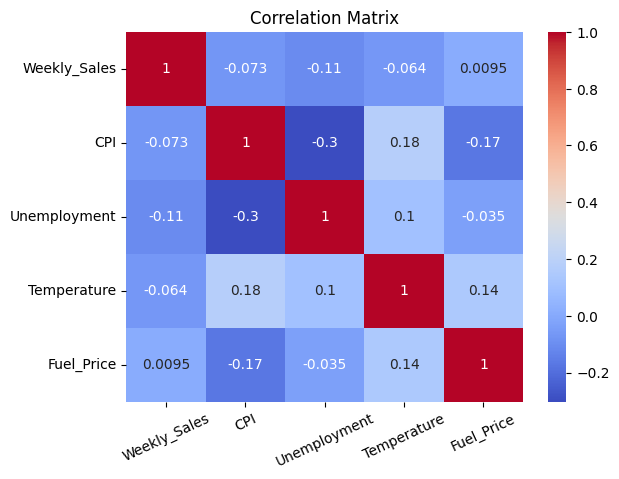

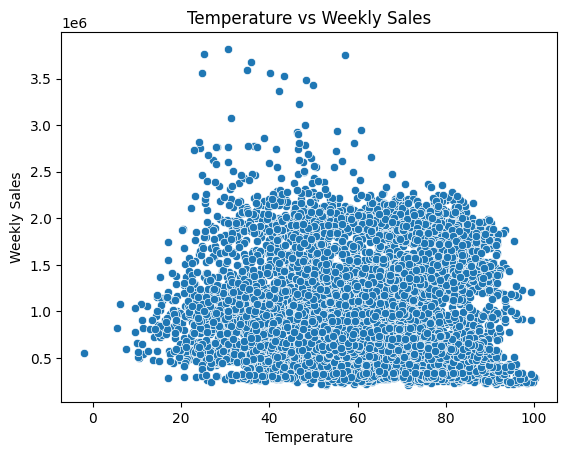

In [ ]:
#identifying what other factors are affecting the sales

#Importing Seaborn for visuals
import seaborn as sns
corr = wm[['Weekly_Sales','CPI','Unemployment','Temperature','Fuel_Price']].corr()
sns.heatmap(corr, annot = True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation = 25)
plt.show()

print()

#Identifying the impact of FUel prices on weekly sales
fuel_price = wm.groupby('Temperature')['Weekly_Sales'].sum()
sns.scatterplot(x = 'Temperature',y = 'Weekly_Sales',data = wm)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Temperature range between **20-60 degree celsius** shows the high chances that the sales will boom